In [202]:
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

FILES_DIR = os.path.abspath('tmp')

In [203]:
def calculateHSI(R, G, B):
    H = np.arccos(((R - G) + (R - B)) / ((2 * np.sqrt(((R - G) ** 2) + (R - B) * (G - B))) + 1e-8))

    if B > G:
        H = 360 - H

    if min(R, G, B) == 1 / 3:
        S = 0
    elif min(R, G, B) == 0:
        S = 1
    else:
        S = 1 - (3 * min(R, G, B) / (R + G + B + 1e-8))

    I = (R + G + B) / 3

    return np.array([H / 2, S * 255, I * 255])

def createHistogram(image, imageName, equalized = False):
    I = np.asarray(image)[:, :, 2]
    
    if equalized:
        imageName = imageName + '_equalized'

    plt.hist(I.flatten(), 256, [0, 256])
    plt.savefig(f'{FILES_DIR}/histograms/{imageName}_hsi.png')
    plt.show()

def convertHSI(image, imageName):
    image = np.asarray(image)
    hsiImage = np.copy(image)

    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            RGB = image[y][x] / 255.0
            hsiImage[y][x] = calculateHSI(*RGB)

    hsiImage = Image.fromarray(hsiImage)
    
    hsiImage.show()
    hsiImage.save(f'{FILES_DIR}/hsi/{imageName}_hsi.bmp')

def equalizeImage(image, imageName):
    image = np.asarray(image)
    equalizedImage = np.copy(image)

    I = image[:, :, 2]
    flattenI = I.flatten()

    values, freqs = np.unique(flattenI, return_counts = True)
    fda = np.cumsum(freqs / flattenI.size)

    newValues = np.rint(fda * np.max(values)).astype(np.uint8)
    mapping = dict(zip(values, newValues))

    newI = np.array([mapping[v] for v in flattenI])
    newI = newI.reshape(*np.asarray(I).shape)

    equalizedImage[:, :, 2] = newI
    equalizedImage = Image.fromarray(equalizedImage)

    equalizedImage.show()
    equalizedImage.save(f'{FILES_DIR}/equalized/{imageName}_equalized_hsi.bmp')

Imagem image1:


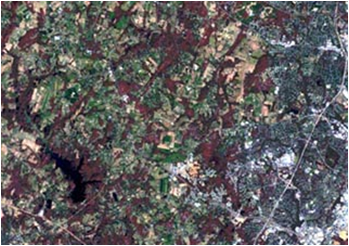

Conversão para HSI:


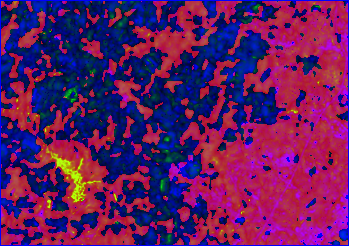

Histograma da Imagem HSI:


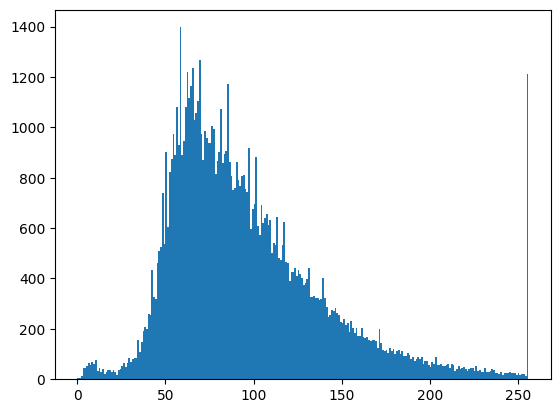

Imagem HSI Equalizada:


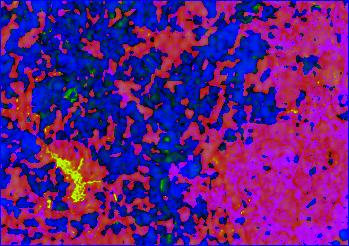

Histograma da Imagem HSI Equalizada:


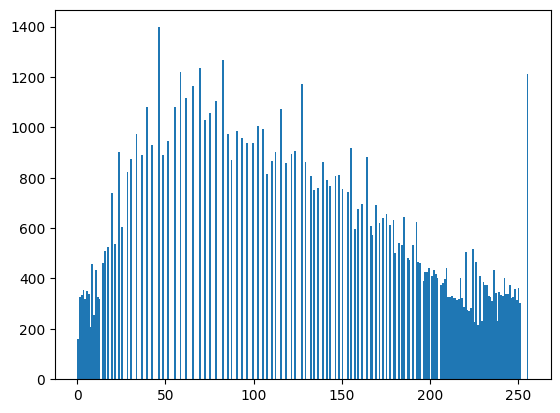

Imagem image2:


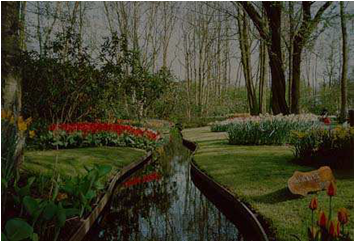

Conversão para HSI:


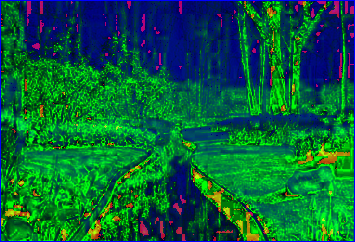

Histograma da Imagem HSI:


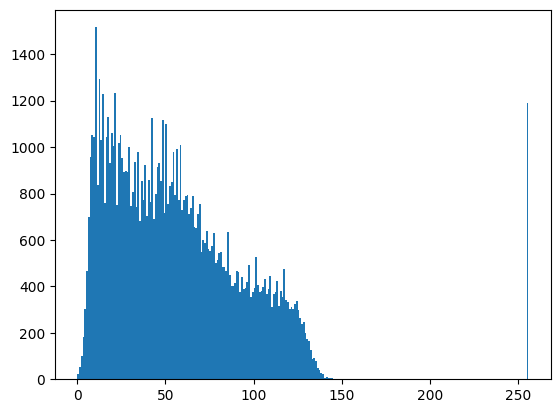

Imagem HSI Equalizada:


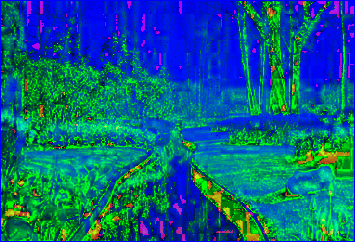

Histograma da Imagem HSI Equalizada:


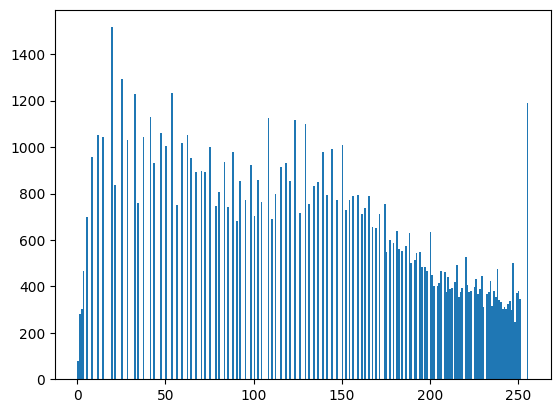

Imagem image3:


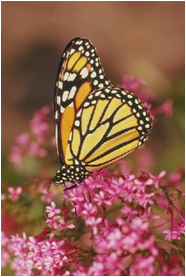

Conversão para HSI:


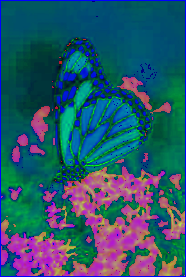

Histograma da Imagem HSI:


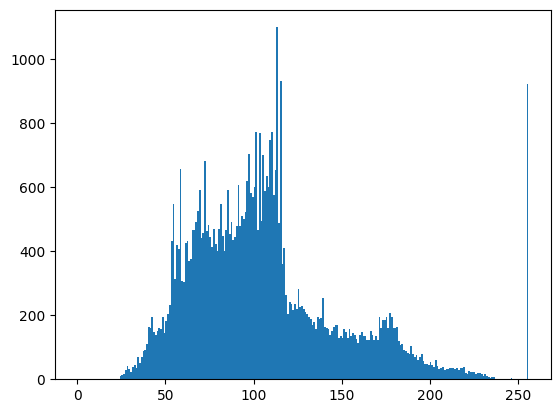

Imagem HSI Equalizada:


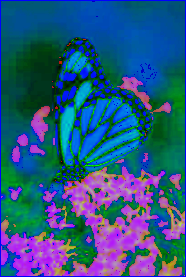

Histograma da Imagem HSI Equalizada:


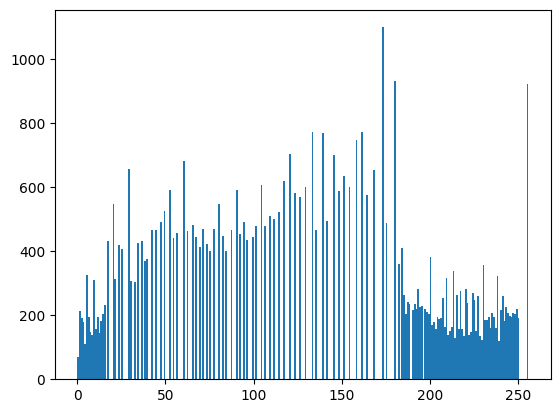

In [204]:
os.makedirs(f'{FILES_DIR}/hsi/', exist_ok = True)
os.makedirs(f'{FILES_DIR}/histograms/', exist_ok = True)
os.makedirs(f'{FILES_DIR}/equalized/', exist_ok = True)

images = [
    'image1',
    'image2',
    'image3'
]

for imageName in images:
    print(f'Imagem {imageName}:')

    image = Image.open(f'{FILES_DIR}/original/{imageName}_rgb.bmp').convert('RGB')
    image.show()

    print('Conversão para HSI:')
    convertHSI(image, imageName)

    hsiImage = Image.open(f'{FILES_DIR}/hsi/{imageName}_hsi.bmp')

    print('Histograma da Imagem HSI:')
    createHistogram(hsiImage, imageName)

    print('Imagem HSI Equalizada:')
    equalizeImage(hsiImage, imageName)

    hsiEqualizedImage = Image.open(f'{FILES_DIR}/equalized/{imageName}_equalized_hsi.bmp')

    print('Histograma da Imagem HSI Equalizada:')
    createHistogram(hsiEqualizedImage, imageName, True)